In [1]:
import csv
import matplotlib.pyplot as plt

In [22]:
file_path = 'data.csv'

Создаем функцию ```read_sales_data(file_path)```, которая принимает путь к файлу и возвращает список продаж. Продажи в свою очередь являются словарями с ключами ```product_name, quantity, price, date```
 (название, количество, цена, дата).

In [23]:
def read_sales_data(file_path):
    sales_data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            sales_record = {
                'product_name': row[0],
                'quantity': int(row[1]),
                'price': float(row[2]),
                'date': row[3]
            }
            sales_data.append(sales_record)
    return sales_data


In [24]:
print(read_sales_data(file_path))

[{'product_name': 'яблоки', 'quantity': 10, 'price': 15.0, 'date': ' 2024-06-21'}, {'product_name': 'груши', 'quantity': 16, 'price': 11.0, 'date': ' 2024-06-22'}, {'product_name': 'сливы', 'quantity': 20, 'price': 15.0, 'date': ' 2024-06-19'}, {'product_name': 'печенье', 'quantity': 16, 'price': 23.0, 'date': ' 2024-06-20'}, {'product_name': 'конфеты', 'quantity': 11, 'price': 22.0, 'date': ' 2024-06-24'}, {'product_name': 'бананы', 'quantity': 12, 'price': 10.0, 'date': ' 2024-06-18'}, {'product_name': 'вишня', 'quantity': 10, 'price': 18.0, 'date': ' 2024-06-23'}, {'product_name': 'молоко', 'quantity': 5, 'price': 50.0, 'date': ' 2024-06-21'}, {'product_name': 'ананасы', 'quantity': 8, 'price': 30.0, 'date': ' 2024-06-24'}, {'product_name': 'апельсины', 'quantity': 14, 'price': 12.0, 'date': ' 2024-06-25'}, {'product_name': 'грейпфрут', 'quantity': 6, 'price': 20.0, 'date': ' 2024-06-26'}, {'product_name': 'киви', 'quantity': 9, 'price': 15.0, 'date': ' 2024-06-27'}, {'product_name'

Создаем функцию ```total_sales_per_product(sales_data)```, которая принимает список продаж и возвращает словарь, где ключ - название продукта, а значение - общая сумма продаж этого продукта.

In [25]:
def total_sales_per_product(sales_data):
    product_sales = {}
    for sale in sales_data:
        product_name = sale['product_name']
        total_price = sale['quantity'] * sale['price']
        if product_name in product_sales:
            product_sales[product_name] += total_price
        else:
            product_sales[product_name] = total_price
    return product_sales

Создаём функцию ```sales_over_time(sales_data)```, которая принимает список продаж и возвращает словарь, где ключ - дата, а значение общая сумма продаж за эту дату.

In [26]:
def sales_over_time(sales_data):
    date_sales = {}
    for sale in sales_data:
        date = sale['date']
        total_price = sale['quantity'] * sale['price']
        if date in date_sales:
            date_sales[date] += total_price
        else:
            date_sales[date] = total_price
    return date_sales

In [27]:
sales_data = read_sales_data(file_path)

product_sales = total_sales_per_product(sales_data)
date_sales = sales_over_time(sales_data)

Создаем функции для следующих задач:
1. Определить, какой продукт принес наибольшую выручку.
2. Определить, в какой день была наибольшая сумма продаж.

In [28]:
def find_max_sales_product(product_sales):
    max_product = max(product_sales, key=product_sales.get)
    return max_product, product_sales[max_product]

def find_max_sales_day(date_sales):
    max_date = max(date_sales, key=date_sales.get)
    return max_date, date_sales[max_date]

In [29]:
max_product, max_product_sales = find_max_sales_product(product_sales)
max_date, max_date_sales = find_max_sales_day(date_sales)

### Результаты:

In [30]:
print(f"Продукт с наибольшей выручкой: {max_product}, сумма: {max_product_sales}")
print(f"День с наибольшей суммой продаж: {max_date}, сумма: {max_date_sales}")

Продукт с наибольшей выручкой: малина, сумма: 540.0
День с наибольшей суммой продаж:  2024-07-05, сумма: 540.0


### График общей суммы продаж по каждому продукту.

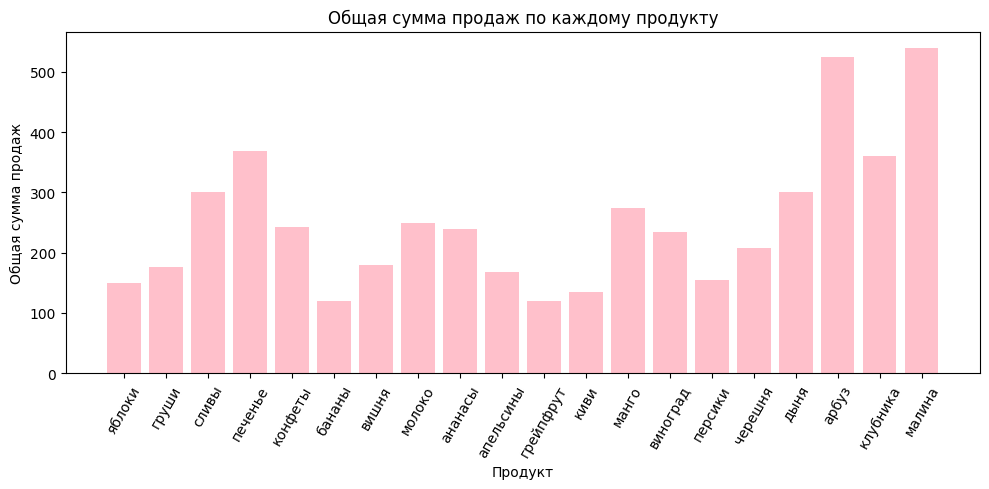

In [31]:
products = list(product_sales.keys())
sales = list(product_sales.values())

plt.figure(figsize=(10, 5))
plt.bar(products, sales, color='pink')
plt.xlabel('Продукт')
plt.ylabel('Общая сумма продаж')
plt.title('Общая сумма продаж по каждому продукту')
plt.xticks(rotation=60)
plt.tight_layout()

### График общей суммы продаж по дням.

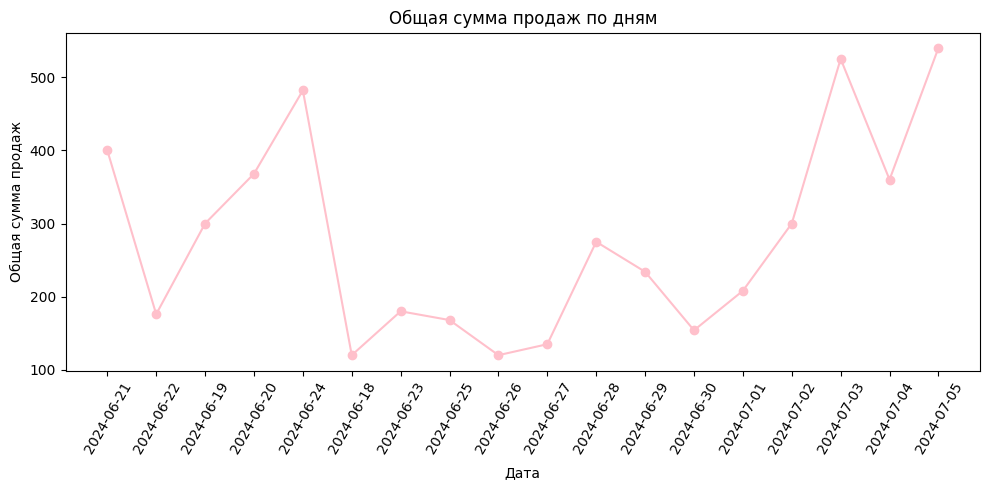

In [32]:
dates = list(date_sales.keys())
sales = list(date_sales.values())
plt.figure(figsize=(10, 5))
plt.plot(dates, sales, marker='o', linestyle='-', color='pink')
plt.xlabel('Дата')
plt.ylabel('Общая сумма продаж')
plt.title('Общая сумма продаж по дням')
plt.xticks(rotation=60)
plt.tight_layout()